# 캐글 데이터 연동


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minseokkim0902","key":"6544c5636bcf324e43b0ab9276a79b03"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         96           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        141           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        265           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2239           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      17251           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4445           False  
connectx

In [ ]:
! kaggle competitions download -c galaxy-zoo-the-galaxy-challenge

  0% 0.00/520k [00:00<?, ?B/s]
100% 520k/520k [00:00<00:00, 77.7MB/s]
  0% 0.00/4.63M [00:00<?, ?B/s]
100% 4.63M/4.63M [00:00<00:00, 76.2MB/s]
  0% 0.00/265k [00:00<?, ?B/s]
100% 265k/265k [00:00<00:00, 84.9MB/s]
 99% 0.99G/1.01G [00:08<00:00, 106MB/s]
100% 1.01G/1.01G [00:08<00:00, 124MB/s]
 99% 787M/792M [00:08<00:00, 94.1MB/s]
100% 792M/792M [00:09<00:00, 92.0MB/s]
  0% 0.00/265k [00:00<?, ?B/s]
100% 265k/265k [00:00<00:00, 86.9MB/s]


In [ ]:
!ls

all_ones_benchmark.zip	     images_training_rev1.zip
all_zeros_benchmark.zip      kaggle.json
central_pixel_benchmark.zip  sample_data
images_test_rev1.zip	     training_solutions_rev1.zip


In [ ]:
!unzip training_solutions_rev1.zip

Archive:  training_solutions_rev1.zip
  inflating: training_solutions_rev1.csv  


In [ ]:
!unzip images_training_rev1.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: images_training_rev1/926425.jpg  
  inflating: images_training_rev1/926426.jpg  
  inflating: images_training_rev1/926435.jpg  
  inflating: images_training_rev1/926446.jpg  
  inflating: images_training_rev1/926448.jpg  
  inflating: images_training_rev1/926453.jpg  
  inflating: images_training_rev1/926462.jpg  
  inflating: images_training_rev1/926478.jpg  
  inflating: images_training_rev1/926480.jpg  
  inflating: images_training_rev1/926484.jpg  
  inflating: images_training_rev1/926488.jpg  
  inflating: images_training_rev1/926509.jpg  
  inflating: images_training_rev1/926522.jpg  
  inflating: images_training_rev1/926544.jpg  
  inflating: images_training_rev1/926547.jpg  
  inflating: images_training_rev1/926548.jpg  
  inflating: images_training_rev1/926551.jpg  
  inflating: images_training_rev1/926602.jpg  
  inflating: images_training_rev1/926630.jpg  
  inflating: images_training_rev1/926649.jpg  
  inflating: images_trai

# 모델 정의 및 학습

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from importlib import reload
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import Xception
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras import backend as K
import tensorflow as tf
import glob
from shutil import copyfile
from keras.models import load_model
from keras import optimizers

In [ ]:
img_shape = (224, 224, 3)

xception_model = Xception(include_top=False, input_shape=img_shape)

83689472/83683744 [==============================] - 0s 0us/step


In [ ]:
classes = [
    'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1',
    'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3',
    'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3',
    'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6',
    'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1', 'Class10.2',
    'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3', 'Class11.4',
    'Class11.5', 'Class11.6'
]


def append_ext(fn):
    return fn + ".jpg"


traindf = pd.read_csv('training_solutions_rev1.csv')

traindf["id"] = traindf['GalaxyID'].astype(str).apply(append_ext)

datagen = ImageDataGenerator(
    fill_mode='nearest',
    cval=0,
    rescale=1. / 255,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.02)

train_generator = datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="images_training_rev1/",
    x_col="id",
    y_col=classes,
    subset="training",
    batch_size=64,
    seed=123,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224))

valid_generator = datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="images_training_rev1/",
    x_col="id",
    y_col=classes,
    subset="validation",
    batch_size=64,
    seed=123,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224))

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size

STEP_SIZE_VALID = valid_generator.n // valid_generator.batch_size

Found 60347 validated image filenames.
Found 1231 validated image filenames.


In [ ]:
print(train_generator.n)

60347


In [ ]:
print(STEP_SIZE_TRAIN)

942


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(xception_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(len(classes), activation='sigmoid'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               25690368  
_________________________________________________________________
dense_1 (Dense)              (None, 37)                9509      
Total params: 46,561,357
Trainable params: 46,506,829
Non-trainable params: 54,528
_________________________________________________________________
None


In [ ]:
print(len(model.trainable_weights))

158


In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001, decay=5e-4)

model.compile(optimizer, loss='mse', metrics=["accuracy"])

In [ ]:
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping


class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))


early_stopping = EarlyStopping(
    monitor='val_loss', patience=4, verbose=1, mode='auto')

history = LossHistory()

from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(
    filepath='today_20_epochs/weights.hdf5', verbose=2, save_best_only=True)

In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=valid_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=30,
    callbacks=[history, checkpointer, early_stopping])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
942/942 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.7190
Epoch 00001: val_loss improved from inf to 0.00946, saving model to today_20_epochs/weights.hdf5
942/942 [==============================] - 1239s 1s/step - loss: 0.0137 - accuracy: 0.7190 - val_loss: 0.0095 - val_accuracy: 0.7895
Epoch 2/30
942/942 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.7786
Epoch 00002: val_loss improved from 0.00946 to 0.00851, saving model to today_20_epochs/weights.hdf5
942/942 [==============================] - 1241s 1s/step - loss: 0.0087 - accuracy: 0.7786 - val_loss: 0.0085 - val_accuracy: 0.8035
Epoch 3/30
942/942 [==============================] - ETA: 0s - loss: 0.0078 - accuracy: 0.7967
Epoch 00003: val_loss improved from 0.00851 to 0.00809, saving model to today_20_epochs/weights.hdf5
942/942 [==============================] - 1240s 1s/step - loss: 0.0078

# 학습 결과 그래프로 나타내기

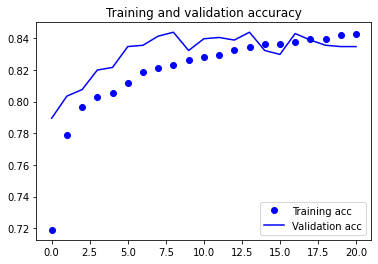

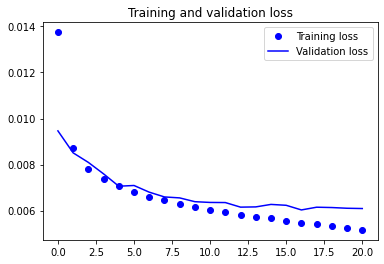

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

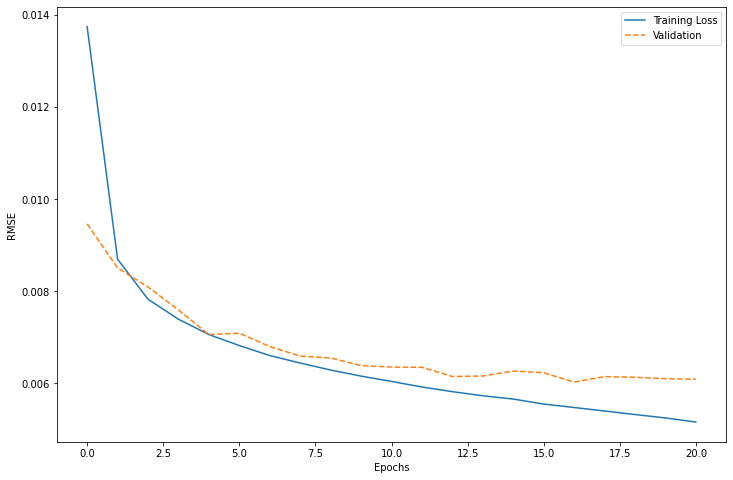

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(hist.epoch, hist.history['loss'], label='Training Loss')
plt.plot(
    hist.epoch, hist.history['val_loss'], label='Validation', linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [ ]:
!pip install pyyaml h5py 

# 학습한 모델 저장

In [ ]:
model.save('my_model_201119.h5') 

In [ ]:
new_model = tf.keras.models.load_model('my_model_201119.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               25690368  
_________________________________________________________________
dense_1 (Dense)              (None, 37)                9509      
Total params: 46,561,357
Trainable params: 46,506,829
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
!unzip images_test_rev1.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: images_test_rev1/944041.jpg  
  inflating: images_test_rev1/944051.jpg  
  inflating: images_test_rev1/944064.jpg  
  inflating: images_test_rev1/944073.jpg  
  inflating: images_test_rev1/944075.jpg  
  inflating: images_test_rev1/944076.jpg  
  inflating: images_test_rev1/944077.jpg  
  inflating: images_test_rev1/944085.jpg  
  inflating: images_test_rev1/944088.jpg  
  inflating: images_test_rev1/944094.jpg  
  inflating: images_test_rev1/944102.jpg  
  inflating: images_test_rev1/944104.jpg  
  inflating: images_test_rev1/944114.jpg  
  inflating: images_test_rev1/944133.jpg  
  inflating: images_test_rev1/944139.jpg  
  inflating: images_test_rev1/944142.jpg  
  inflating: images_test_rev1/944147.jpg  
  inflating: images_test_rev1/944152.jpg  
  inflating: images_test_rev1/944153.jpg  
  inflating: images_test_rev1/944155.jpg  
  inflating: images_test_rev1/944207.jpg  
  inflating: images_test_rev1/944214.jpg  
  inflating: image

In [ ]:
!unzip all_zeros_benchmark.zip

Archive:  all_zeros_benchmark.zip
  inflating: all_zeros_benchmark.csv  


In [ ]:
!unzip all_ones_benchmark.zip

Archive:  all_ones_benchmark.zip
  inflating: all_ones_benchmark.csv  


# 결과 예측

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    r"./xception_test",
    class_mode=None,
    color_mode="rgb",
    batch_size=1,
    target_size=(224, 224),
    seed=123,
    shuffle=False)

Found 79975 images belonging to 1 classes.


In [ ]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc', test_acc)

Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc 0.0


In [ ]:
test_generator.reset()

predictions = model.predict_generator(
    test_generator,
    steps=test_generator.n / test_generator.batch_size,
    verbose=1)

print(predictions.shape)

Instructions for updating:
Please use Model.predict, which supports generators.
79975/79975 [==============================] - 794s 10ms/step
(79975, 37)


In [ ]:
def get_id(fname):
    return fname.replace(".jpg", "").split("/")[1]


header = open('all_zeros_benchmark.csv', 'r').readlines()[0]

with open('Output_201119.csv', 'w') as outfile:
    outfile.write(header)
    for i in range(len(test_generator.filenames)):
        id_ = (get_id(test_generator.filenames[i]))
        pred = predictions[i]
        outline = id_ + "," + ",".join([str(x) for x in pred])
        outfile.write(outline + "\n")

In [ ]:
df = pd.read_csv("Output_201119.csv", header=None)
print(df.head())

         0           1           2   ...             35             36           37
0  GalaxyID    Class1.1    Class1.2  ...      Class11.4      Class11.5    Class11.6
1    100018  0.50467163    0.485025  ...   0.0019266054   0.0038309728   0.09499946
2    100037   0.5303586  0.45762995  ...  0.00017906073   0.0005200229   0.01408682
3    100042  0.72755057  0.27606827  ...   6.573796e-05  0.00057727634  0.019515598
4    100052  0.61899126  0.34112057  ...   0.0008178132    0.002336147  0.025306558

[5 rows x 38 columns]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
